#**PROJET: ANALYSE DES COMMANDES PAR COMMERCIAL**

Team Master 2 (Data Analyst Vendredi-Samedi VS):
- ED SOUDANE YASSINE
- KOUKI OUSSAMA 
- MARIPO TSIVERY 



Install pyspark packages

In [ ]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 46.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=64b050b9bb5b58f788dfde7f889e2ef3f194c01a443e9d5040cf2db16a1016ae
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


# 1- Create pyspark session

In [ ]:
# Create Spark Session
from pyspark.context import SparkContext, SparkConf
from pyspark.sql.context import SQLContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import sum, col, desc 
spark = SparkSession.builder.appName('Transformations').getOrCreate()

# 2- Read csv tables

In [ ]:
commande = spark.read.option("header",True) \
                .option("delimiter",",") \
  .csv("/content/sample_data/projet spark/Commandes.csv")

In [ ]:
commerciaux = spark.read.option("header",True) \
                .option("delimiter",",") \
  .csv("/content/sample_data/projet spark/Commerciaux.csv")

# 3- Show dataframe

In [ ]:
commerciaux.show()

+---------------+----------------+-------------+-----------+------------+--------------------+--------------+
|Num. Commercial|      Commercial|Date Embauche|Num. Bureau|Num. Manager|               Titre|Salaire Annuel|
+---------------+----------------+-------------+-----------+------------+--------------------+--------------+
|              1|   Charles Bonte|   01/10/2009|          5|           4|          Commercial|         61000|
|              2|      Cyril Pons|   14/09/2008|          1|        null|           President|         80000|
|              3|  Benoit Schmidt|   01/10/2009|          1|           4|          Commercial|         63000|
|              4|    Andre Rollin|   03/09/2009|          3|           2|Directeur Commercial|         70000|
|              5|   Roger Cormier|   17/10/2010|          3|           4|          Commercial|         61300|
|              6|   Clara Clement|   17/01/2009|          4|           4|          Commercial|         61200|
|         

# 4- Show columns

In [ ]:
commerciaux.columns

['Num. Commercial',
 'Commercial',
 'Date Embauche',
 'Num. Bureau',
 'Num. Manager',
 'Titre',
 'Salaire Annuel']

In [ ]:
commande.columns

['Date',
 'Num_Client',
 'NumCommercial',
 'Poids',
 'NumCommande',
 'NumTransporteur',
 'Annee',
 'Mois',
 'Annee-Mois',
 'Mois Texte',
 'Trimestre',
 'Cle Objectif']

# 5- Relation between table commerciaux and commande

In [ ]:
commande.join(commerciaux,commande['NumCommercial'] == commerciaux['`Num. Commercial`'],"inner" ).columns

['Date',
 'Num_Client',
 'NumCommercial',
 'Poids',
 'NumCommande',
 'NumTransporteur',
 'Annee',
 'Mois',
 'Annee-Mois',
 'Mois Texte',
 'Trimestre',
 'Cle Objectif',
 'Num. Commercial',
 'Commercial',
 'Date Embauche',
 'Num. Bureau',
 'Num. Manager',
 'Titre',
 'Salaire Annuel']

# 6- Create new column name for easy manipulation

In [ ]:
newcol=['Date',
 'Num_Client',
 'NumCommercial',
 'Poids',
 'NumCommande',
 'NumTransporteur',
 'Annee',
 'Mois',
 'Annee-Mois',
 'MoisTexte',
 'Trimestre',
 'CleObjectif',
 'NumCommercial',
 'Commercial',
 "DateEmbauche",
 'NumBureau',
 'NumManager',
 'Titre',
 'SalaireAnnuel']

# 7- Convert the inner join of the commerciaux and commande into a dataframe

In [ ]:
df=commande.join(commerciaux,commande['NumCommercial'] == commerciaux['`Num. Commercial`'],"inner" ).toDF('Date',
 'Num_Client',
 'NumCommercial',
 'Poids',
 'NumCommande',
 'NumTransporteur',
 'Annee',
 'Mois',
 'Annee_Mois',
 'Mois_Texte',
 'Trimestre',
 'CleObjectif',
 'NumCommercial',
 'Commercial',
 "DateEmbauche",
 'NBureau',
 'NManager',
 'Titre',
 'Salaire_Annuel')

# 8- Show the result of the conversion and sql query

In [ ]:
df.show()

+---------+----------+-------------+-----+-----------+---------------+-----+---------+-----------+----------+---------+--------------+-------------+----------------+------------+-------+--------+-------------------+--------------+
|     Date|Num_Client|NumCommercial|Poids|NumCommande|NumTransporteur|Annee|     Mois| Annee_Mois|Mois_Texte|Trimestre|   CleObjectif|NumCommercial|      Commercial|DateEmbauche|NBureau|NManager|              Titre|Salaire_Annuel|
+---------+----------+-------------+-----+-----------+---------------+-----+---------+-----------+----------+---------+--------------+-------------+----------------+------------+-------+--------+-------------------+--------------+
|21-Jan-11|        25|            8|76.43|      10337|              2| 2011|01 - janv|vendredi-01|   janvier|       T1|vendredi-01@25|            8|Charlotte Peyron|  05/03/2009|      2|       2|Coordinateur Ventes|         65000|
|19-Feb-11|        65|            2|33.19|      10262|              2| 2011|

# 9- Change the type of the column Num_Client into int

In [ ]:
df.withColumn("Num_Client",df['Num_Client'].cast('int'))

DataFrame[Date: string, Num_Client: int, NumCommercial: string, Poids: string, NumCommande: string, NumTransporteur: string, Annee: string, Mois: string, Annee_Mois: string, Mois_Texte: string, Trimestre: string, CleObjectif: string, NumCommercial: string, Commercial: string, DateEmbauche: string, NBureau: string, NManager: string, Titre: string, Salaire_Annuel: string]

# 10- Create a temporary view of the new dataframe

In [ ]:
df.createOrReplaceTempView("df")

# 11-Show the columns of the new dataframe

In [ ]:
df.columns

['Date',
 'Num_Client',
 'NumCommercial',
 'Poids',
 'NumCommande',
 'NumTransporteur',
 'Annee',
 'Mois',
 'Annee_Mois',
 'Mois_Texte',
 'Trimestre',
 'CleObjectif',
 'NumCommercial',
 'Commercial',
 'DateEmbauche',
 'NBureau',
 'NManager',
 'Titre',
 'Salaire_Annuel']

# 12- Create new dataframe rslt from the the total sales by commercial by order asc

In [ ]:
rslt=spark.sql('select Commercial ,count(Commercial) from df group by Commercial order  by Commercial asc')

# 13- Display the datatype of the rslt

In [ ]:
rslt

DataFrame[Commercial: string, count(Commercial): bigint]

# 14- Show the content of the new dataframe rslt

In [ ]:
rslt.show()

+----------------+-----------------+
|      Commercial|count(Commercial)|
+----------------+-----------------+
|    Andre Rollin|               56|
|  Benoit Schmidt|              154|
|   Charles Bonte|              134|
|Charlotte Peyron|              103|
|   Clara Clement|               55|
|      Cyril Pons|               55|
|       Lina Rieu|              121|
|  Maelys Bossard|              105|
|   Roger Cormier|               53|
+----------------+-----------------+



# 15- Import graphics library

In [ ]:
import plotly.graph_objs as go

# 16- Convert into Pandas dataframe the spark dataframe rslt for graph usage

In [ ]:
x=rslt.toPandas()

# 17- Show the columns of the pandas dataframe

In [ ]:
rslt.columns

['Commercial', 'count(Commercial)']

# 18- Import additional library for the graph

In [ ]:
import matplotlib.pyplot as plt

# 19- Transform the dataframe into Pandas Dataframe and show the content

In [ ]:
rslt=rslt.toPandas()

In [ ]:
rslt

,Commercial,count(Commercial)
0,Andre Rollin,56
1,Benoit Schmidt,154
2,Charles Bonte,134
3,Charlotte Peyron,103
4,Clara Clement,55
5,Cyril Pons,55
6,Lina Rieu,121
7,Maelys Bossard,105
8,Roger Cormier,53


# 20- Graph of the Total Commandes per Commercial

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

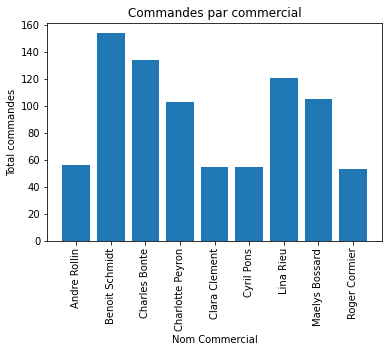

In [ ]:
#Commande par commercial
plt.title('Commandes par commercial')
plt.xlabel('Nom Commercial')
plt.ylabel('Total commandes')
plt.bar(rslt['Commercial'],rslt['count(Commercial)'])
plt.xticks(rotation=90)

# 21- Count the total commandes per year

In [ ]:
rslt1=spark.sql('select Annee ,count(Annee) from df group by Annee order  by Annee asc')

# 22- Convert the result into Pandas dataframe for graphic usage

In [ ]:
rslt1=rslt1.toPandas()

# 23- Show the count of commandes per year

In [ ]:
rslt1

,Annee,count(Annee)
0,2011,76
1,2012,124
2,2013,369
3,2014,267


# 24- Final graph total commandes per year 

<BarContainer object of 4 artists>

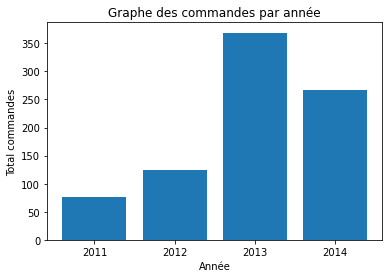

In [ ]:
# Add title and axis names
plt.title('Graphe des commandes par année')
plt.xlabel('Année')
plt.ylabel('Total commandes')
# Show graph
plt.bar(rslt1['Annee'],rslt1['count(Annee)'])